In [ ]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

In [3]:
import torch
import clip
from PIL import Image
from map_key_frame import *
import os
# Tải mô hình và bộ mã hóa
device = "cuda" if torch.cuda.is_available() else "cpu"

model, preprocess = clip.load("ViT-B/32", device=device)
print(device)

cpu


In [4]:
path_folder = "/Users/vothanhnhan/Desktop/gift/AIC2/datasets/Keyframes"
# Duyệt qua cơ sở dữ liệu hình ảnh
from tqdm import tqdm
def learning_data(path_image_folder, model, preprocess):
    path_keyframes = os.listdir(path_image_folder) # Thay bằng các đường dẫn hình ảnh thực tế
    image_paths = []
    for path_keyframe in path_keyframes:
        if path_keyframe[0] != "k":
            continue
        for path_video in os.listdir(path_image_folder+"/"+path_keyframe):
            if path_video[0] != "L":
                continue
            for image in os.listdir(path_image_folder+"/"+path_keyframe+"/"+path_video):
                image_paths.append(path_folder+"/"+path_keyframe+"/"+path_video+"/"+image)
    image_features_list = []
    for image_path_in_folder in tqdm(image_paths):
        image_path = image_path_in_folder
        image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
        with torch.no_grad():
            image_features = model.encode_image(image)
            image_features_list.append(("_".join(image_path_in_folder.split("/")[-3:]), image_features))
    return image_features_list
        

In [5]:
data_1 = learning_data(path_folder,model,preprocess)
torch.save(data_1,"pre_trained_5.pt")

100%|██████████| 75370/75370 [1:34:37<00:00, 13.28it/s]   


In [9]:
data_1 = torch.load("pre_trained_5.pt")

for x,y in data_1:
    print(x)


keyframes-20_L21_V003_189.jpg
keyframes-20_L21_V003_162.jpg
keyframes-20_L21_V003_176.jpg
keyframes-20_L21_V003_348.jpg
keyframes-20_L21_V003_360.jpg
keyframes-20_L21_V003_406.jpg
keyframes-20_L21_V003_412.jpg
keyframes-20_L21_V003_374.jpg
keyframes-20_L21_V003_599.jpg
keyframes-20_L21_V003_228.jpg
keyframes-20_L21_V003_214.jpg
keyframes-20_L21_V003_572.jpg
keyframes-20_L21_V003_566.jpg
keyframes-20_L21_V003_200.jpg
keyframes-20_L21_V003_016.jpg
keyframes-20_L21_V003_002.jpg
keyframes-20_L21_V003_003.jpg
keyframes-20_L21_V003_017.jpg
keyframes-20_L21_V003_567.jpg
keyframes-20_L21_V003_201.jpg
keyframes-20_L21_V003_215.jpg
keyframes-20_L21_V003_573.jpg
keyframes-20_L21_V003_229.jpg
keyframes-20_L21_V003_598.jpg
keyframes-20_L21_V003_413.jpg
keyframes-20_L21_V003_375.jpg
keyframes-20_L21_V003_361.jpg
keyframes-20_L21_V003_407.jpg
keyframes-20_L21_V003_349.jpg
keyframes-20_L21_V003_177.jpg
keyframes-20_L21_V003_163.jpg
keyframes-20_L21_V003_188.jpg
keyframes-20_L21_V003_149.jpg
keyframes-

In [29]:
path_folder = "/Users/vothanhnhan/Desktop/gift/AIC2/datasets/Keyframe"
# Duyệt qua cơ sở dữ liệu hình ảnh
from map_key_frame import *
import os
from tqdm import tqdm
def change_name(path_image_folder):
    path_keyframes = os.listdir(path_image_folder) # Thay bằng các đường dẫn hình ảnh thực tế
    image_paths = []
    for path_keyframe in tqdm(path_keyframes):
        if path_keyframe[0] != "k":
            continue
        for path_video in os.listdir(path_image_folder+"/"+path_keyframe):
            if path_video[0] != "L":
                continue
            for image in os.listdir(path_image_folder+"/"+path_keyframe+"/"+path_video):
                image_paths.append(path_keyframe+"_"+path_video+"_"+image.split('.')[0] +"_"+ str(extract(image,"/Users/vothanhnhan/Desktop/gift/AIC_EITA/datasets/map-keyframes"+"/"+path_video+".csv"))+".jpg")
    image_features_list = []
    return image_paths
tmp = change_name(path_folder)
print(tmp[:10])

  0%|          | 0/13 [00:00<?, ?it/s]

  8%|▊         | 1/13 [00:10<02:11, 10.96s/it]


KeyboardInterrupt: 

In [10]:
path_keyframes = os.listdir(path_folder)
print(path_keyframes[:12])

['keyframes-20', '.DS_Store', 'keyframes-19', 'keyframes-21', 'keyframes-23', 'keyframes-22']


In [10]:
import torch
tmp1 = torch.load('/Users/vothanhnhan/Desktop/gift/AIC2/model/pre_trained_2.pt')
#print(tmp1[0])
for i in range(len(tmp1)):
    tmp2 = list(tmp1[i])
    tmp2[0] = tmp[i]
    tmp1[i] = tuple(tmp2)
print(tmp1[0]) 
torch.save(tmp1,'/Users/vothanhnhan/Desktop/gift/AIC2/model/pre_trained_3.pt')

('keyframes-9_L10_V019_189_19783.jpg', tensor([[-1.2096e-01,  1.5224e-01,  2.5745e-01,  8.8669e-02,  2.5019e-02,
          2.3191e-02, -3.6757e-01, -1.2239e-01, -2.0393e-01,  2.1932e-01,
          1.9205e-01,  2.4462e-01,  7.4349e-01,  3.5749e-01,  6.0703e-01,
          2.9543e-01, -8.0454e-01,  4.4086e-01, -8.0332e-02, -2.0330e-01,
          6.6874e-01,  5.0564e-01, -1.3252e-01, -1.0825e-01,  2.5453e-03,
          7.7099e-02,  2.1352e-01,  2.8609e-01, -2.2295e-01,  2.3316e-02,
         -5.1670e-01, -4.4682e-01, -4.1658e-01, -2.1158e-01,  5.2726e-02,
          2.7861e-01,  3.4252e-01,  4.4490e-01,  3.5647e-01,  6.1804e-01,
          2.6475e-02,  5.2125e-01, -2.0443e-02,  1.8134e-01, -2.7992e-01,
          1.9350e+00,  2.4448e-01,  4.7662e-02,  5.0005e-01, -4.6561e-01,
         -1.4261e-01, -3.8404e-01, -1.5227e-01, -8.5962e-02, -2.1385e-01,
         -3.1342e-01,  8.7073e-01,  3.5651e-01,  4.8692e-01, -3.0871e-01,
          1.1768e+00, -3.5827e-01,  1.4328e-01,  3.6422e-01,  1.1229e-01,

In [3]:
def read_caption(path):
    f = open(path,'r')
    dict = {}
    cnt = 1
    cap = []
    path_pre = "/Users/vothanhnhan/Desktop/gift/AIC/datasets/Flickr 8k/Images"
    caption_independence = []
    for lines in f:
        path_file, caption = lines.split(',',1)
        cap.append(caption[:-2])
        caption_independence.append(caption[:-2])
        if cnt % 5 == 0:
            dict[os.path.join(path_pre,path_file)] = cap
            if(cnt == 5):
                print(os.path.join(path_pre,path_file))
            cap = []
        cnt += 1
    return dict,caption_independence

In [53]:
list_caption,caption = read_caption("/Users/vothanhnhan/Desktop/gift/AIC/datasets/Flickr 8k/captions.txt")

/Users/vothanhnhan/Desktop/gift/AIC/datasets/Flickr 8k/Images/1000268201_693b08cb0e.jpg


In [4]:
import torch
data1 = torch.load("/Users/vothanhnhan/Desktop/gift/AIC2/model/pretrained_chou1.pt",map_location=torch.device('cpu'))
data2 = torch.load("/Users/vothanhnhan/Desktop/gift/AIC2/model/pretrain_chou2.pt",map_location=torch.device('cpu'))
print(data1[:2])
data = data1 + data2
torch.save(data,"pretrained_nhan.pt")

[('keyframes-0_L01_V001_001.jpg', tensor([[ 2.7563e-01,  2.9541e-01,  3.6646e-01,  4.4824e-01, -1.3293e-01,
         -1.4685e-01, -1.2622e-01,  6.0596e-01,  5.9180e-01,  2.7441e-01,
          4.6558e-01, -3.3716e-01,  1.3586e-01,  2.0898e-01, -6.0938e-01,
         -6.4453e-02, -4.7095e-01,  3.5205e-01,  1.0352e-01, -5.0244e-01,
          3.7598e-01,  1.3965e-01, -4.7119e-02,  3.3057e-01, -8.9722e-02,
         -6.6833e-02, -4.3945e-02,  1.3965e-01,  1.5344e-01, -4.6191e-01,
         -3.9404e-01, -2.4536e-01, -8.4839e-02,  2.9858e-01,  3.0487e-02,
         -3.1885e-01,  2.5879e-01,  1.2741e-02,  3.0542e-01,  9.0088e-01,
         -2.0126e-02,  5.0488e-01,  9.7122e-03,  2.3425e-01, -2.5171e-01,
          3.7817e-01, -6.9519e-02,  3.8574e-02,  6.0352e-01, -2.9272e-01,
          4.4434e-02, -1.8079e-01,  4.5923e-01, -7.0984e-02,  4.1992e-01,
         -3.1250e-01,  1.4526e-01,  1.8921e-01,  6.7810e-02, -4.1162e-01,
         -5.3662e-01, -6.4551e-01, -3.4814e-01,  5.1562e-01,  2.9053e-01,
    

In [7]:
image_features_list = learning_data(path_folder,model,preprocess)

106589


  0%|          | 0/106589 [00:00<?, ?it/s]

: 

In [87]:
def features_text(text):
    text_inputs = torch.cat([clip.tokenize(text)]).to(device)
    with torch.no_grad():
        text_features = model.encode_text(text_inputs)
    return text_features
print(len(image_features_list))


8091


In [66]:
import numpy as np
def evaluation(caption,list_caption_true, image_features_list):
    loss = 0
    text_features_list = [features_text(caption_one) for caption_one in caption]
    cnt = 0
    for path,features in image_features_list:
        similarity = np.argmax(np.array([torch.nn.functional.cosine_similarity(text_features, features, dim=1).item() for text_features in text_features_list]))
        text_predict = text_features_list[similarity]
        for caption_true in list_caption_true[path]:
            loss += (1 - torch.nn.functional.cosine_similarity(text_predict,features_text(caption_true), dim=1).item())
        cnt += 1
        if cnt % 10 == 0:
            print(loss/(cnt*5))
    return loss/(5*len(image_features_list))

In [6]:
print(image_features_list[0][0])

keyframes-9_L10_V019_189.jpg


In [9]:
import pandas as pd 

torch.save(image_features_list,'/Users/vothanhnhan/Desktop/gift/AIC2/model/pre_trained_2.pt')

bắt đầu truy vấn 

truy van:  a man smoking
Hinh anh thu 1: 0.32218098640441895	 name: /Users/vothanhnhan/Desktop/gift/AIC/datasets/Flickr 8k/Images/3269380710_9161b0bd00.jpg 



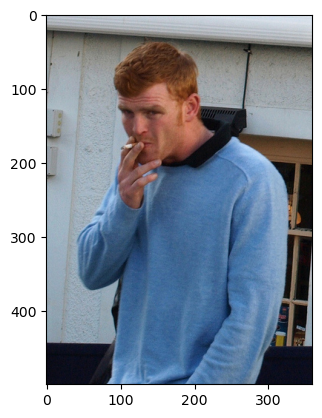

Hinh anh thu 2: 0.3211861848831177	 name: /Users/vothanhnhan/Desktop/gift/AIC/datasets/Flickr 8k/Images/808245064_8a7971fc5b.jpg 



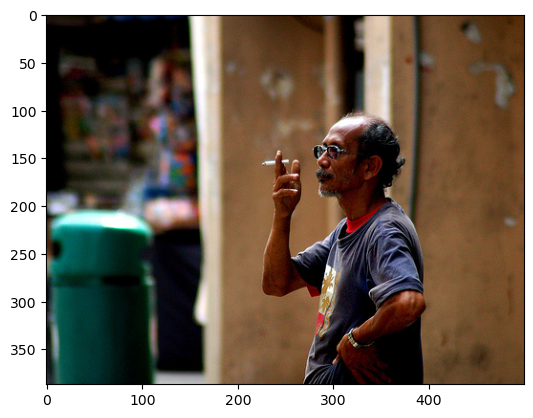

Hinh anh thu 3: 0.3143658936023712	 name: /Users/vothanhnhan/Desktop/gift/AIC/datasets/Flickr 8k/Images/2218609886_892dcd6915.jpg 



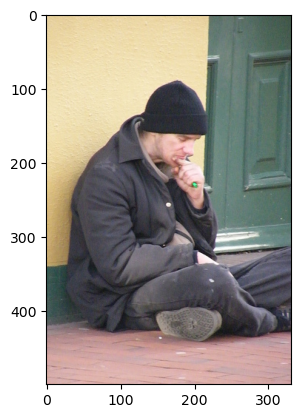

In [83]:

# Tìm hình ảnh có đặc trưng gần nhất với đặc trưng văn bản
#16h52
import PIL.Image as Image
import matplotlib.pyplot as plt
import numpy as np
text = "a man smoking"
# Chuẩn bị văn bản
text_inputs = torch.cat([clip.tokenize(text)]).to(device)

with torch.no_grad():
    text_features = model.encode_text(text_inputs)

image_features_list1 = torch.load("/Users/vothanhnhan/Desktop/gift/AIC/datasets/Flickr 8k/pre_trained.pt")
similarities = [(path, torch.nn.functional.cosine_similarity(text_features, features, dim=1).item()) for path, features in image_features_list1]
similarities.sort(key=lambda x: x[1], reverse=True)

# Hình ảnh phù hợp nhất
ans = np.array(similarities)
best_match_image_path = ans[:3]
print(f"truy van: ",text)
i = 1
for e in best_match_image_path:
  print(f"Hinh anh thu {i}: {e[1]}\t name: {e[0]} \n".format(i))
  i += 1
  im = plt.imread(e[0])
  plt.imshow(im)
  plt.show()


In [2]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from scipy.spatial.distance import cosine

# Tải tokenizer và model của XLM-RoBERTa
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")
model = AutoModel.from_pretrained("xlm-roberta-base")

# Hai đoạn văn bản bằng tiếng Anh và tiếng Việt
text_en = "The weather today is really nice."
text_vi = "Thời tiết hôm nay thực sự rất đẹp."

# Tokenize các đoạn văn bản
inputs_en = tokenizer(text_en, return_tensors='pt', padding=True, truncation=True)
inputs_vi = tokenizer(text_vi, return_tensors='pt', padding=True, truncation=True)

# Tính toán các embeddings cho văn bản
with torch.no_grad():
    embeddings_en = model(**inputs_en).last_hidden_state.mean(dim=1).squeeze()
    embeddings_vi = model(**inputs_vi).last_hidden_state.mean(dim=1).squeeze()

# Chuyển embeddings từ tensor sang numpy
embeddings_en = embeddings_en.cpu().numpy()
embeddings_vi = embeddings_vi.cpu().numpy()

# Tính toán độ tương đồng bằng cách sử dụng khoảng cách cosine
similarity = 1 - cosine(embeddings_en, embeddings_vi)

print(f"Độ tương đồng giữa hai văn bản là: {similarity:.4f}")


Độ tương đồng giữa hai văn bản là: 0.9967
